exploratory data analysis

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [4]:
# Load the datasets
X_train = pd.read_csv(r"D:\Train_60\Train_60\Train_60\X_Train_Data_Input.csv")
Y_train = pd.read_csv(r"D:\Train_60\Train_60\Train_60\Y_Train_Data_Target.csv")
X_test = pd.read_csv(r"D:\Test_20\Test_20\Test_20\X_Test_Data_Input.csv")
Y_test = pd.read_csv(r"D:\Test_20\Test_20\Test_20\Y_Test_Data_Target.csv")

In [5]:
# Preview the data
print("X_train DataFrame:")
print(X_train.head())
print("\nY_train DataFrame:")
print(Y_train.head())

X_train DataFrame:
                                 ID  Column0  Column1  Column2   Column3  \
0  ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495     3726  0.678139   
1  7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495     3454  0.452580   
2  22ba388e7dd14c13342c49e75fc29dda      2.0     2495     4543 -1.577453   
3  59f9b981472d97342587fb3e6392aeb1      0.0      211       59       NaN   
4  f6317cf7ecf126859804eddff279aead      0.0      718      950 -2.028572   

    Column4   Column5   Column6   Column7   Column8  ...  Column13  Column14  \
0  0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0  0.001351   
1  0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0  0.001351   
2 -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1  0.001351   
3       NaN       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   
4 -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0       NaN   

   Column15  Column16  Column17  Column18  

In [6]:
# Check for missing values
print("\nMissing values in X_train:")
print(X_train.isnull().sum())
print("\nMissing values in Y_train:")
print(Y_train.isnull().sum())



Missing values in X_train:
ID               0
Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
target           0
dtype: int64

Missing values in Y_train:
ID        0
target    0
dtype: int64


In [7]:
# Descriptive statistics
print("\nDescriptive statistics for X_train:")
print(X_train.describe())



Descriptive statistics for X_train:
             Column0        Column1        Column2        Column3  \
count  785124.000000  785133.000000  785133.000000  658830.000000   
mean        0.440757    1321.788614    2951.279411      -0.000210   
std         1.163275     907.267965    2143.140140       0.999935   
min         0.000000   -1080.000000     -47.000000      -2.028572   
25%         0.000000     515.000000    1129.000000      -0.675216   
50%         0.000000    1173.000000    2709.000000       0.678139   
75%         0.000000    2435.000000    4472.000000       0.678139   
max        18.000000    2499.000000   10290.000000       0.678139   

             Column4        Column5        Column6        Column7  \
count  657423.000000  617953.000000  781283.000000  785133.000000   
mean       -0.000855      -0.000367      -0.000709       0.000727   
std         1.000350       1.015255       0.998984       1.045883   
min        -1.855728      -0.007469      -0.407939      -0.015607

In [17]:
# Visualizing the distribution of target variable (if it's categorical)
if Y_train.shape[1] == 1:
    target_column = Y_train.columns[1]
    sns.countplot(data=Y_train, x=target_column)
    plt.title("Distribution of Target Variable")
    plt.show()

In [18]:
# Check for class imbalance in the target variable
if Y_train['target'].nunique() <= 10:  # Assuming it's a categorical variable
    print("\nClass Distribution in Target Variable:")
    print(Y_train['target'].value_counts(normalize=True))


Class Distribution in Target Variable:
target
0    0.905706
1    0.094294
Name: proportion, dtype: float64


In [12]:
Y_train.head()

,ID,target
0,ad1a67e4cbddc767a3456b0d94299b9e,0
1,7246d2f76ac0c217ec25e72ea5f014cb,0
2,22ba388e7dd14c13342c49e75fc29dda,0
3,59f9b981472d97342587fb3e6392aeb1,1
4,f6317cf7ecf126859804eddff279aead,0


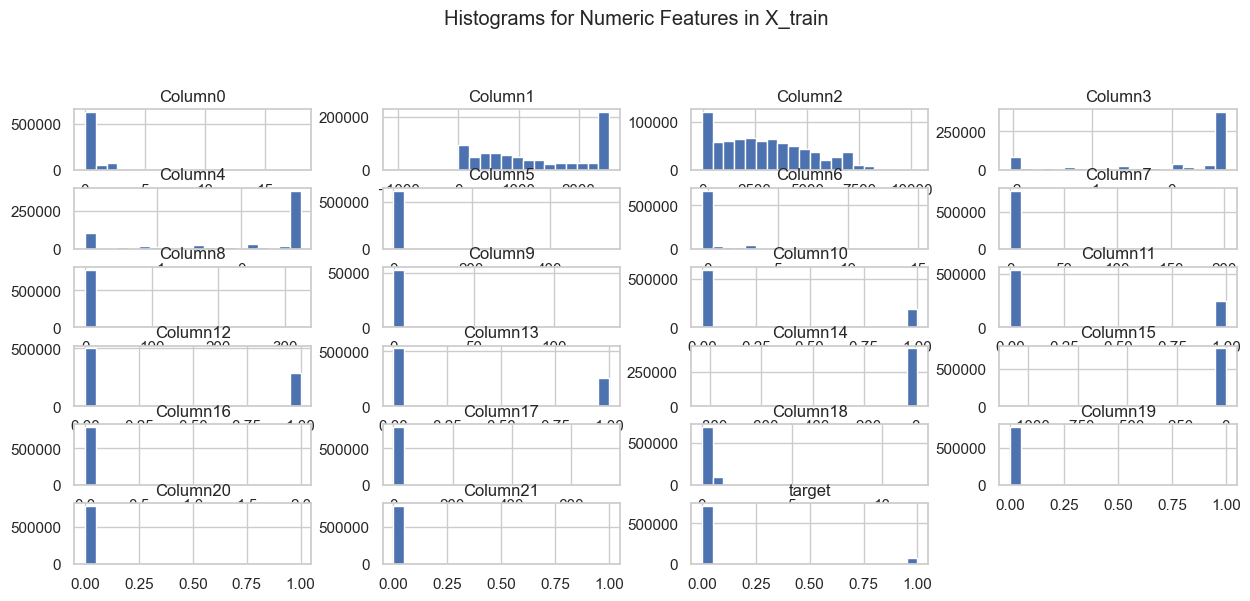

In [20]:
# Plotting histograms for numeric features
X_train.hist(bins=20, figsize=(15, 10), layout=(10, 4))
plt.suptitle("Histograms for Numeric Features in X_train")
plt.show()

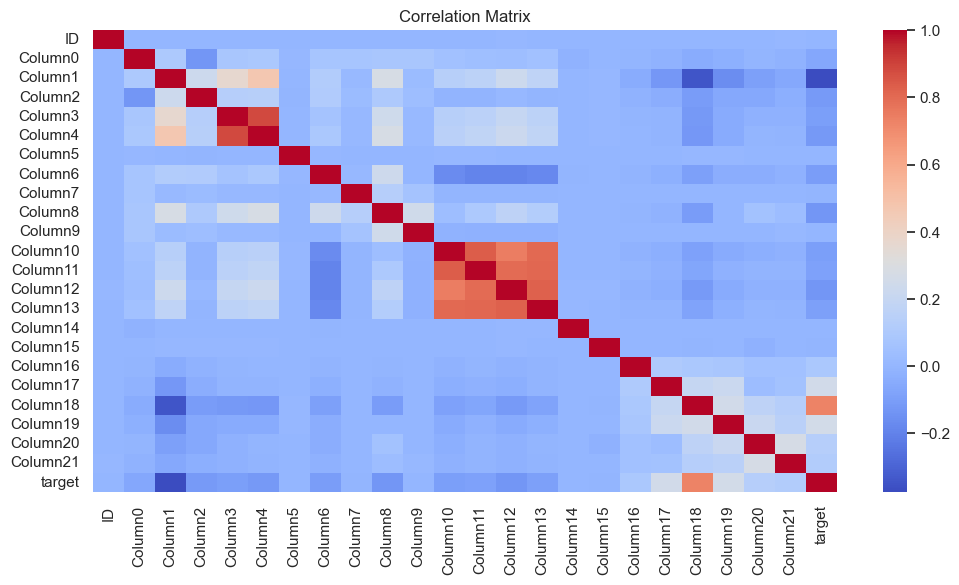

In [25]:
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(include=['object']).columns

# Encode non-numeric columns using Label Encoding
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])

# Now, calculate the correlation matrix
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


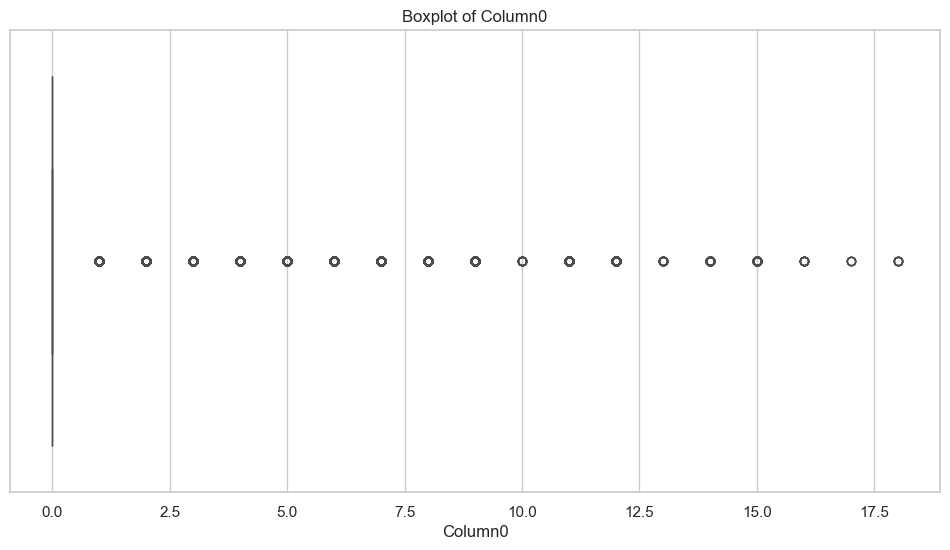

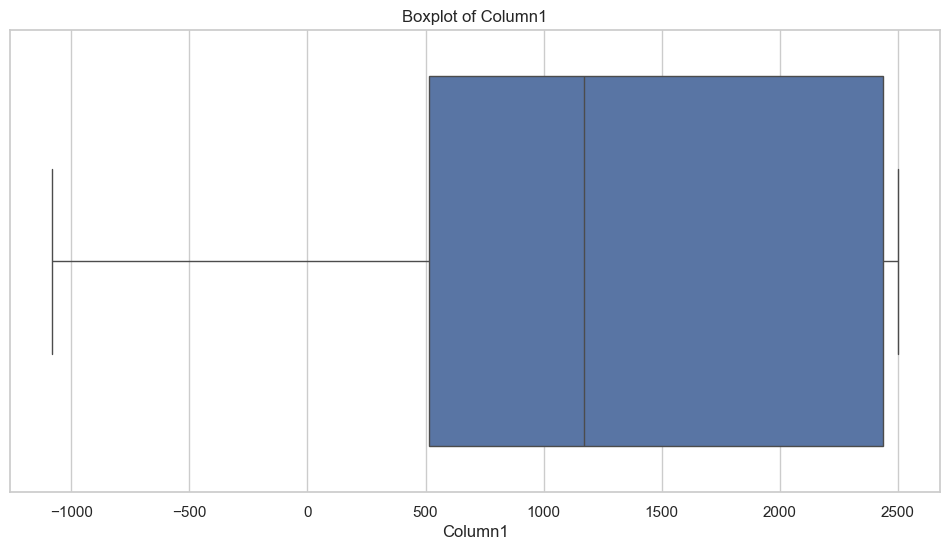

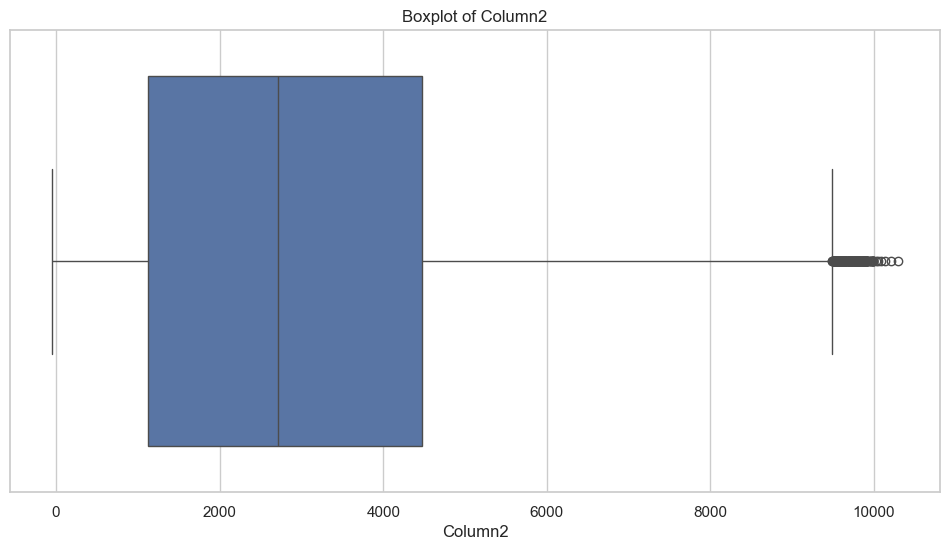

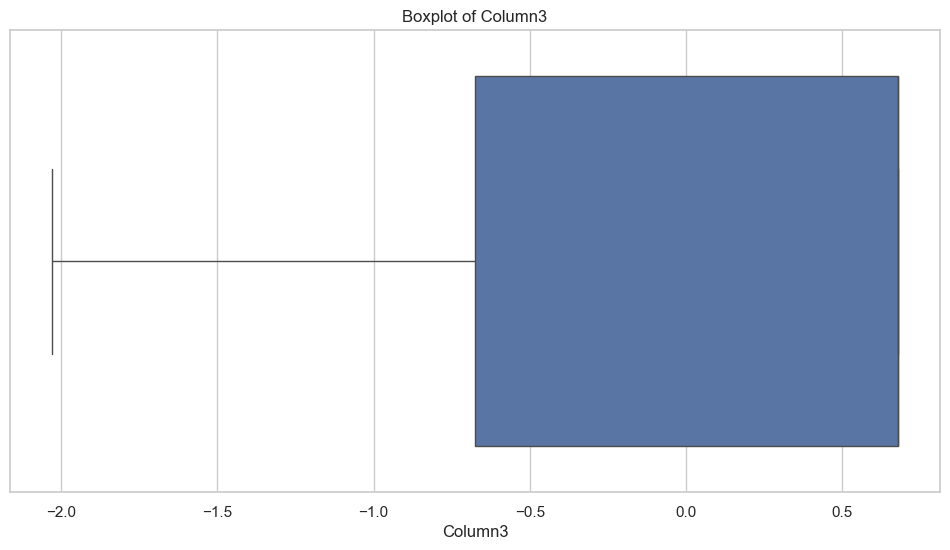

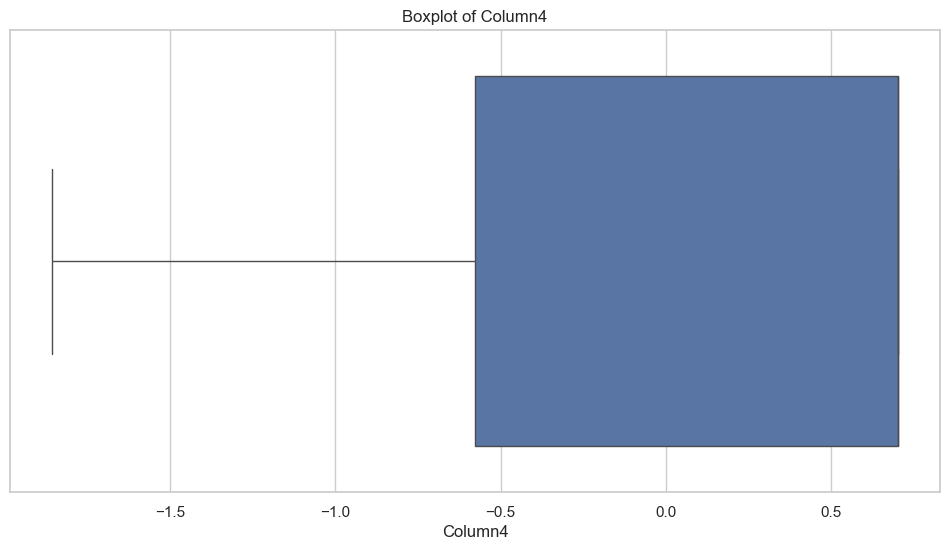

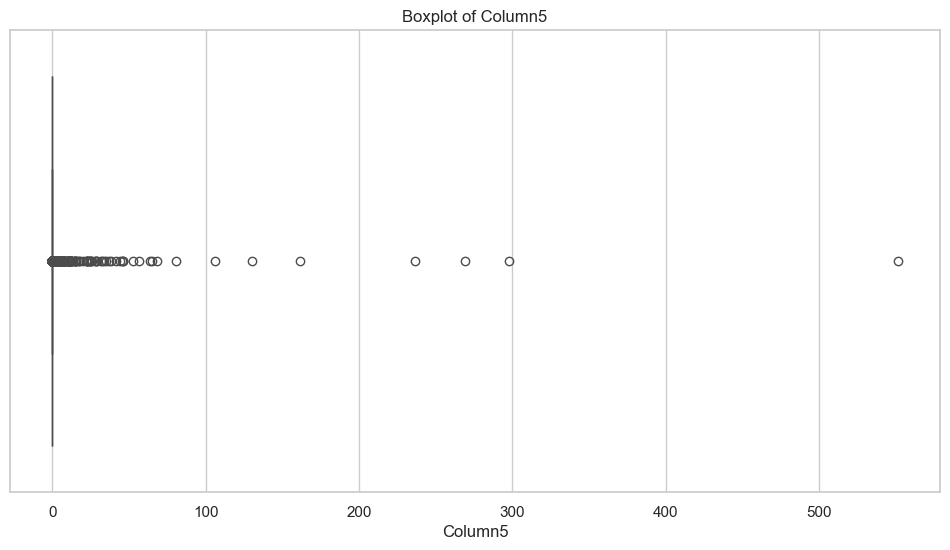

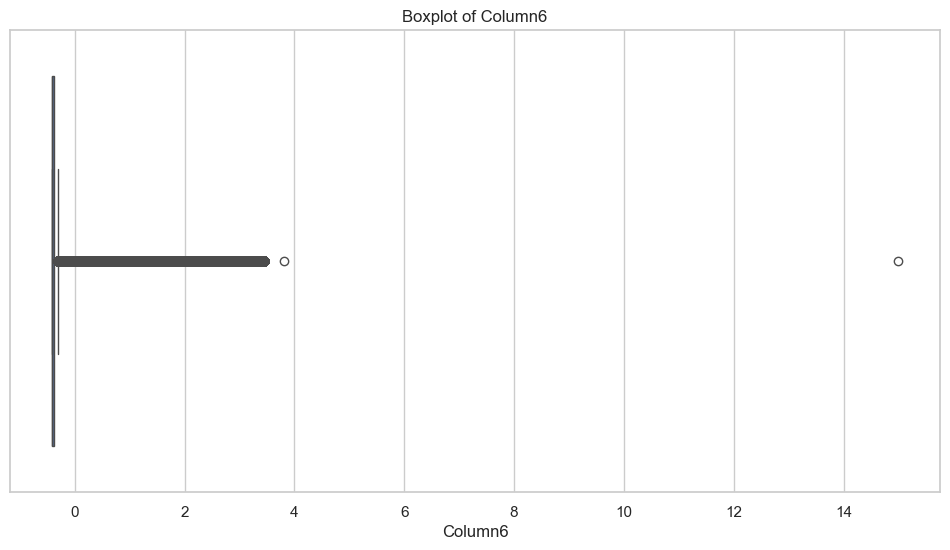

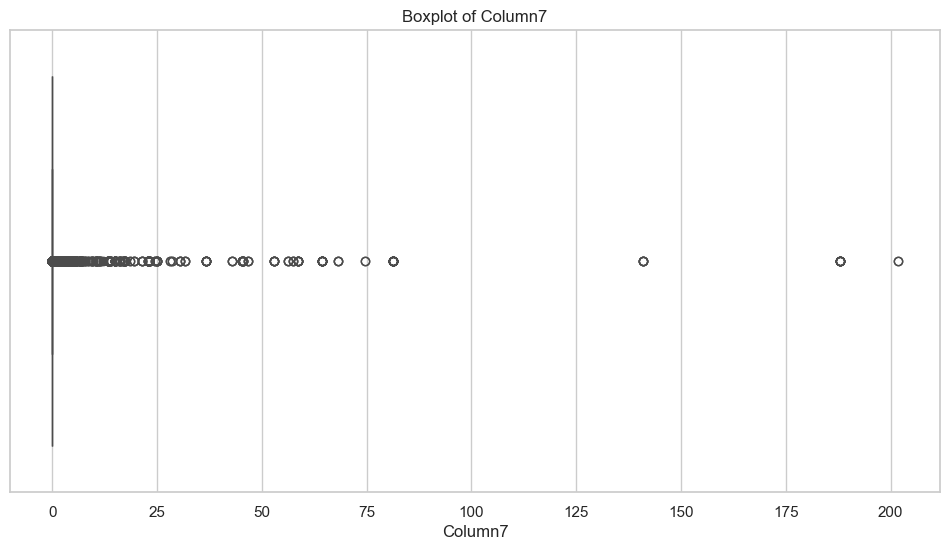

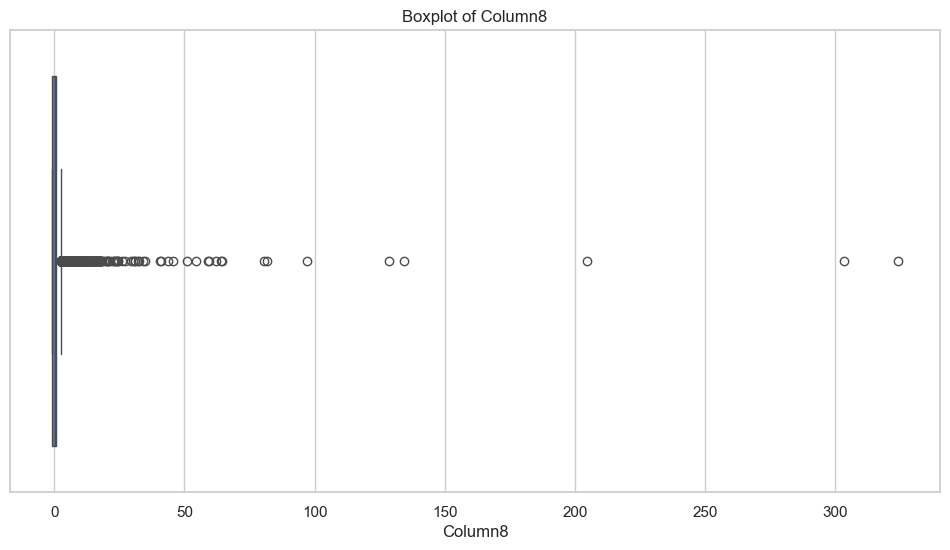

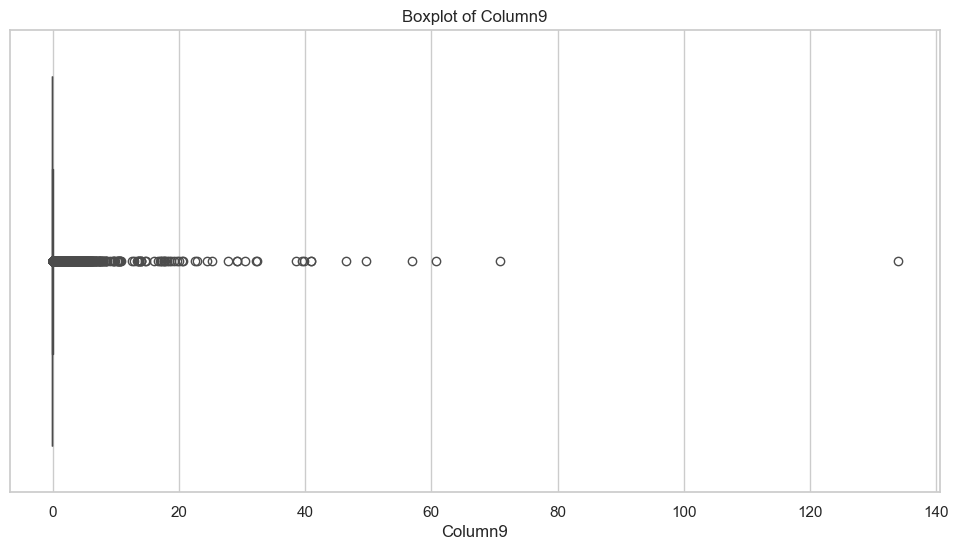

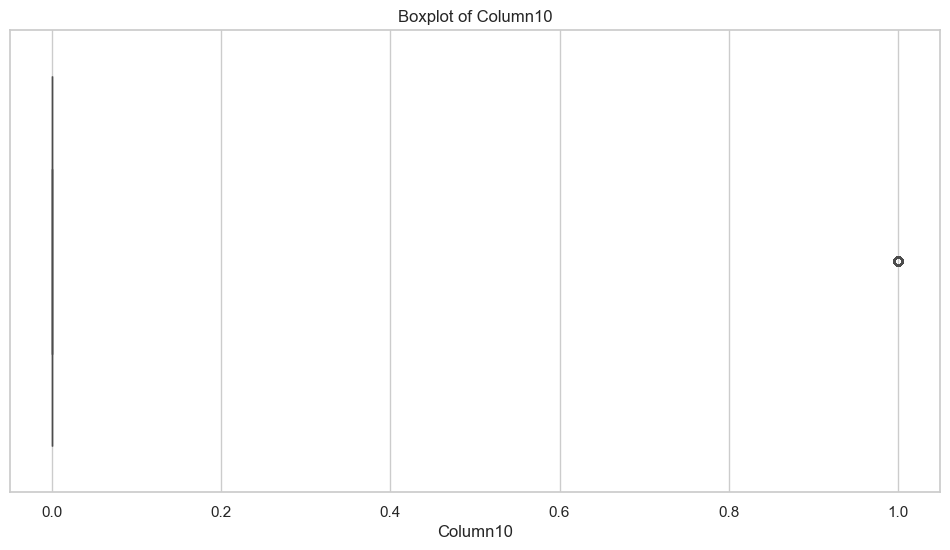

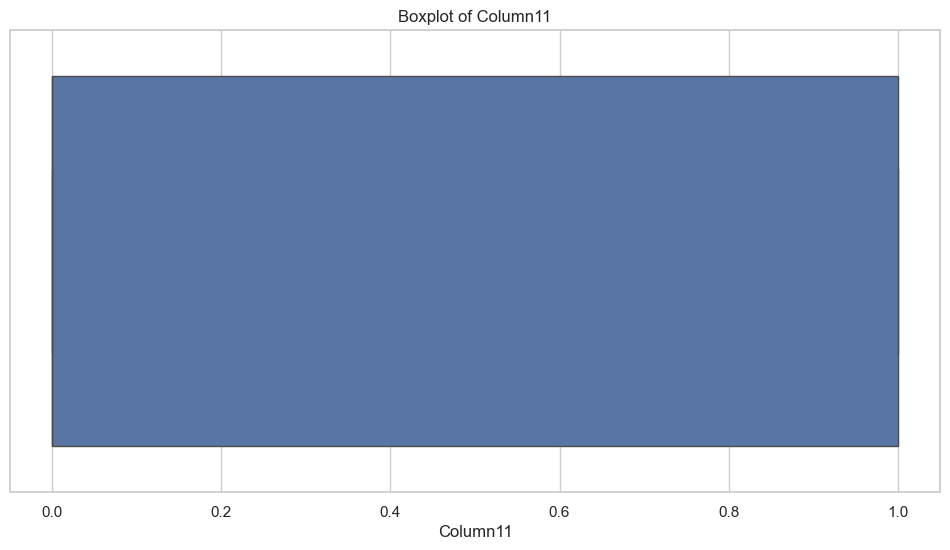

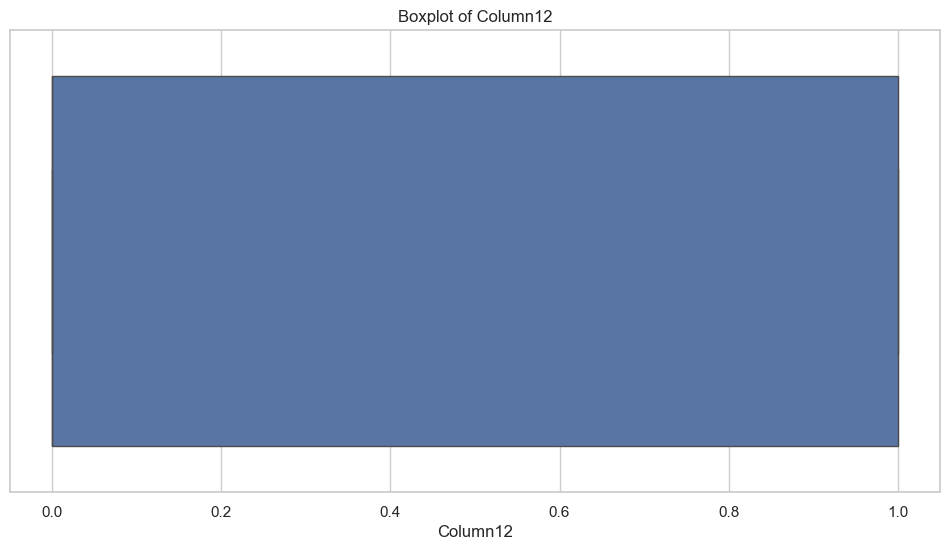

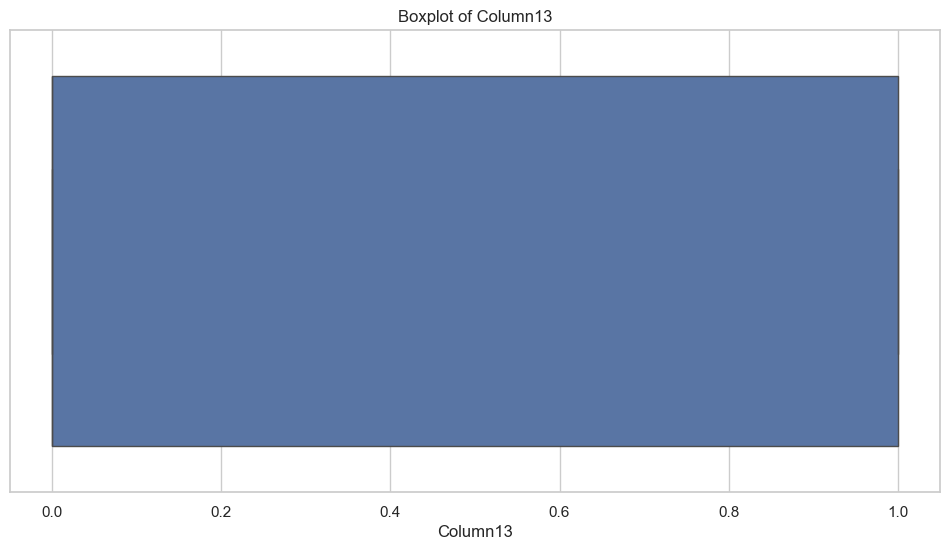

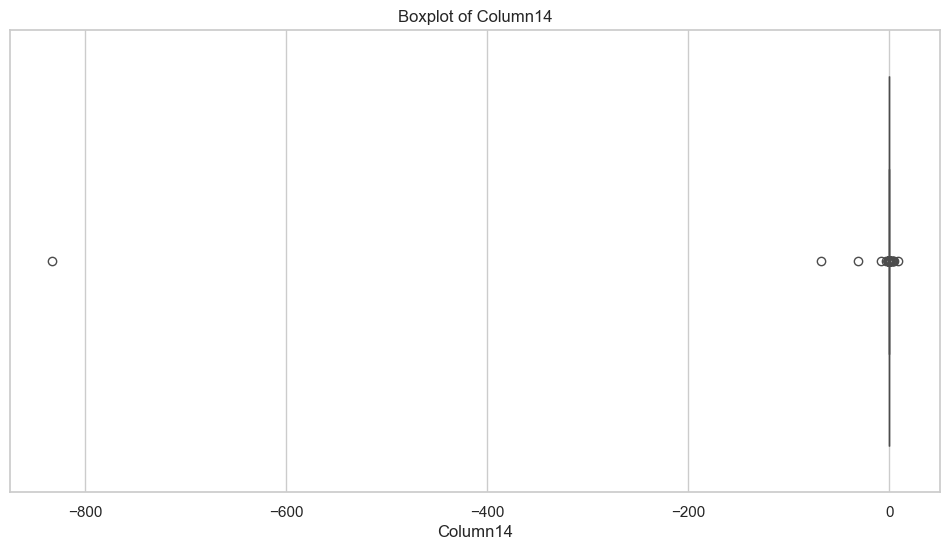

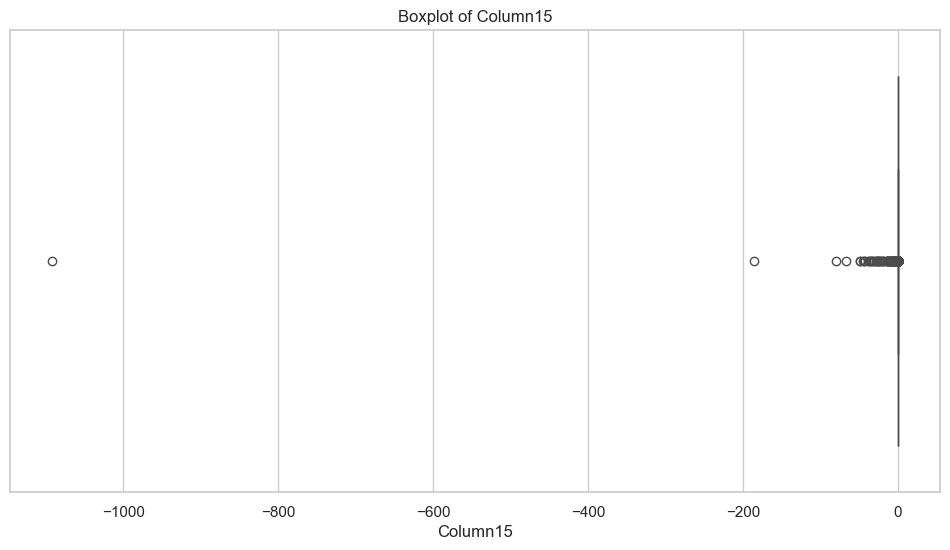

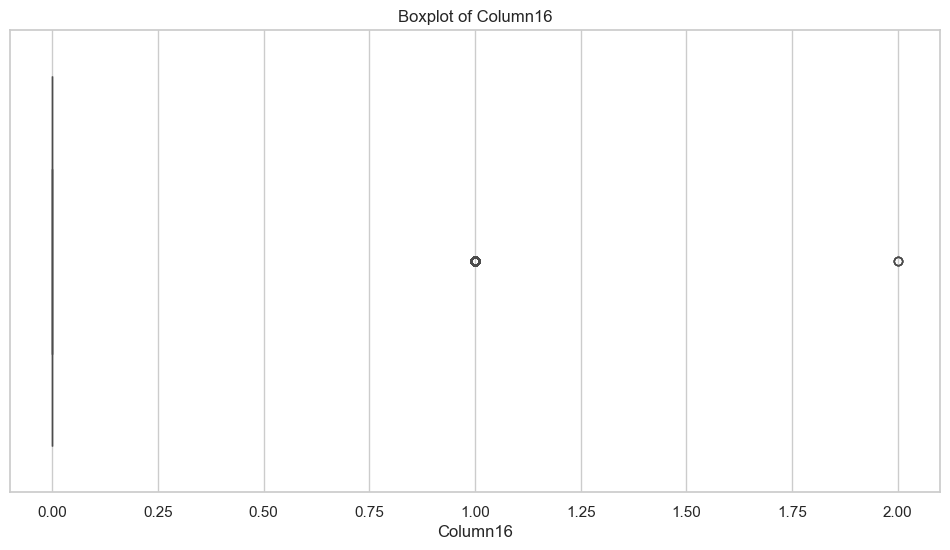

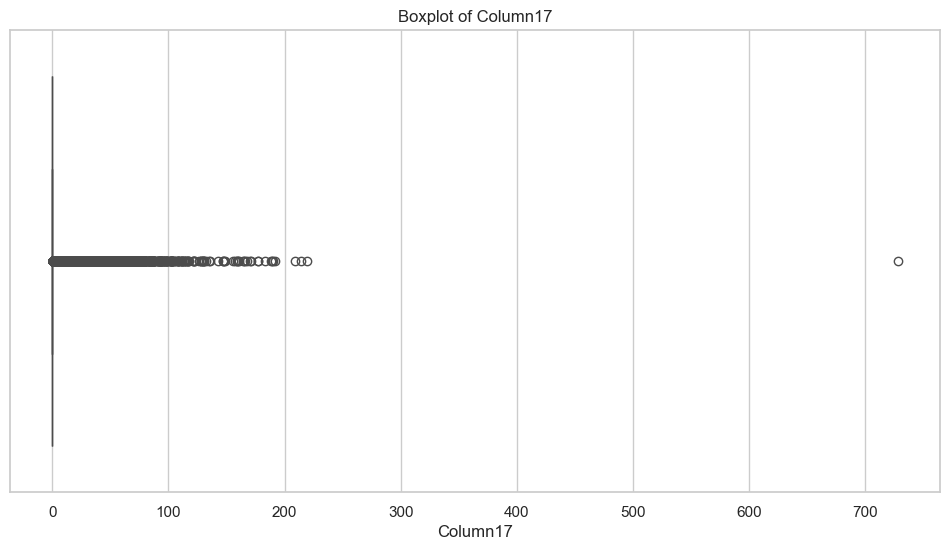

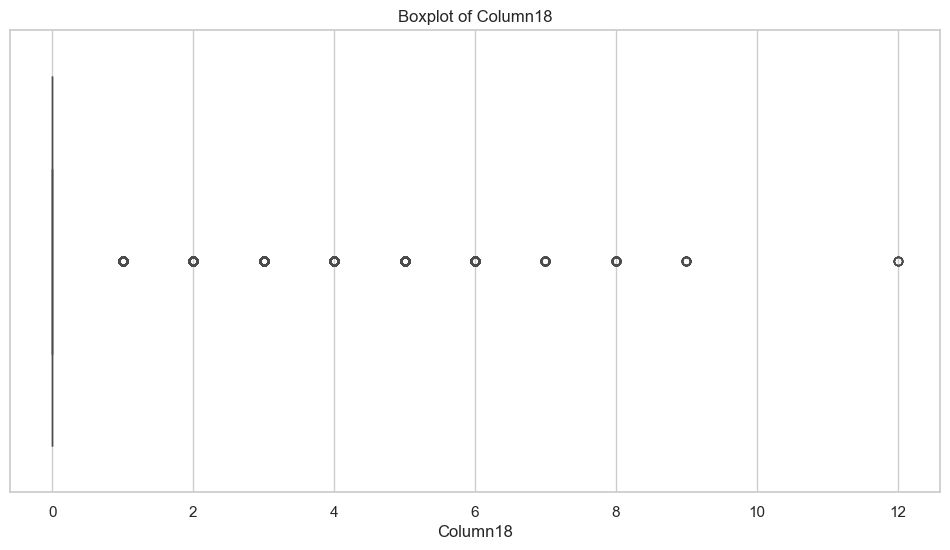

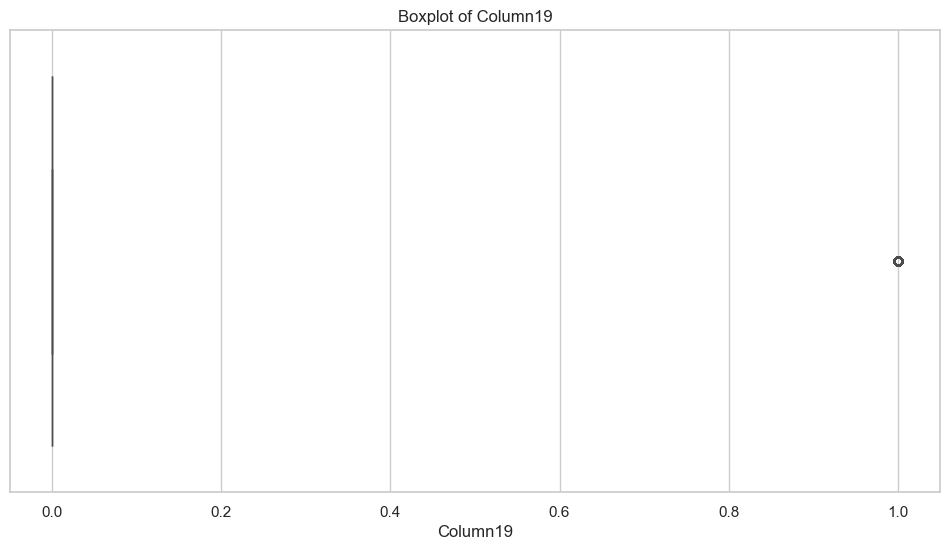

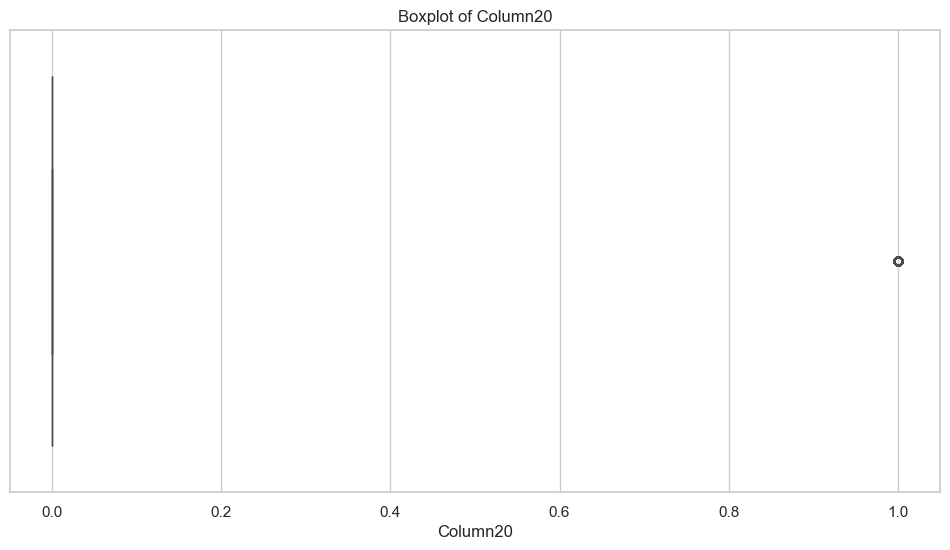

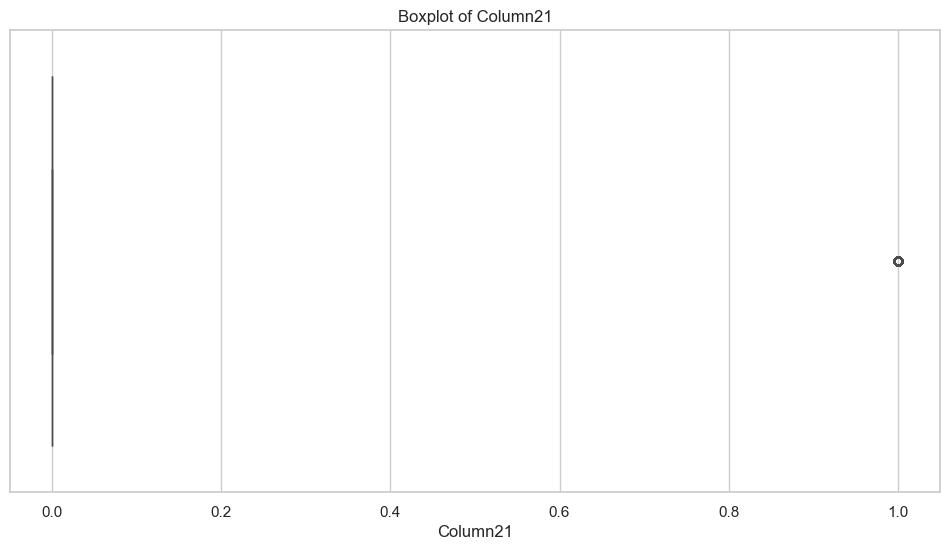

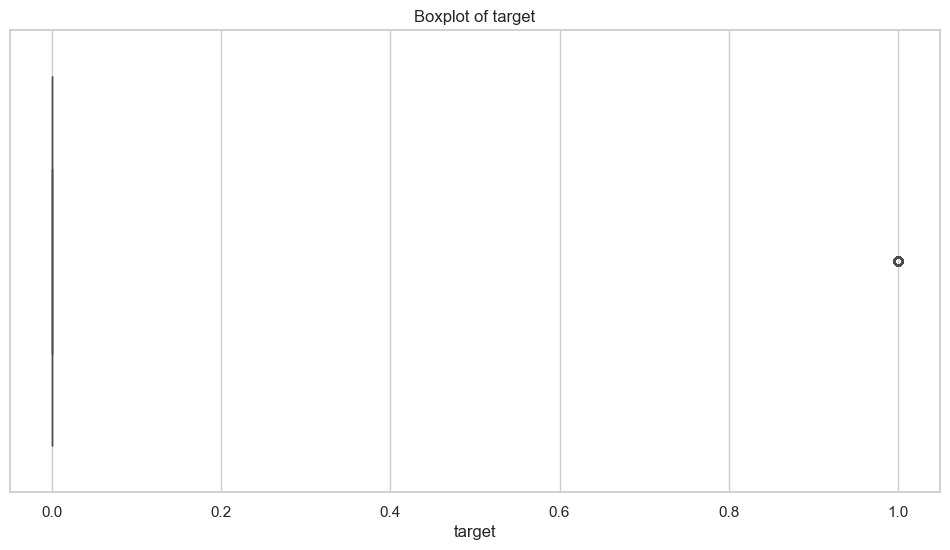

In [22]:
# Box plots to detect outliers for each numeric feature
for column in X_train.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=X_train[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


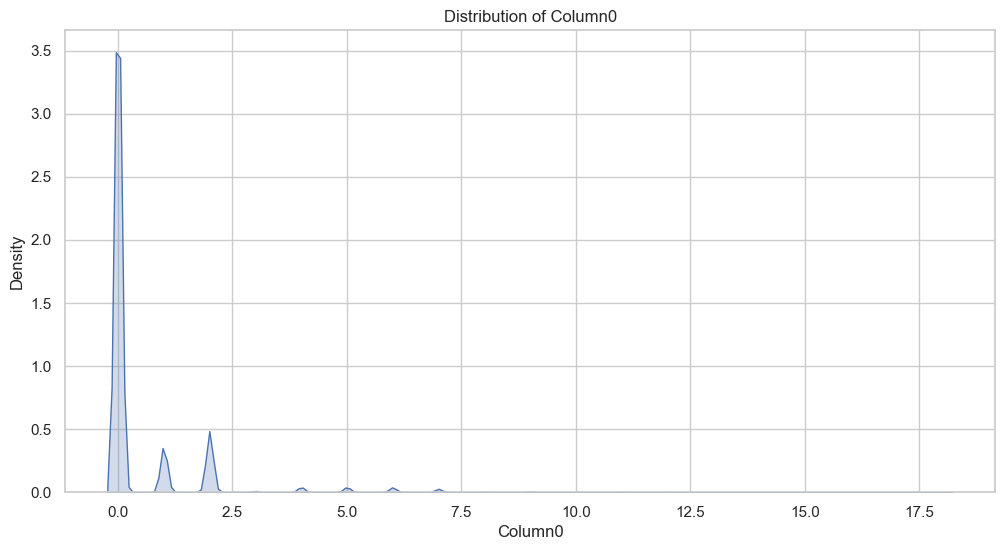

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


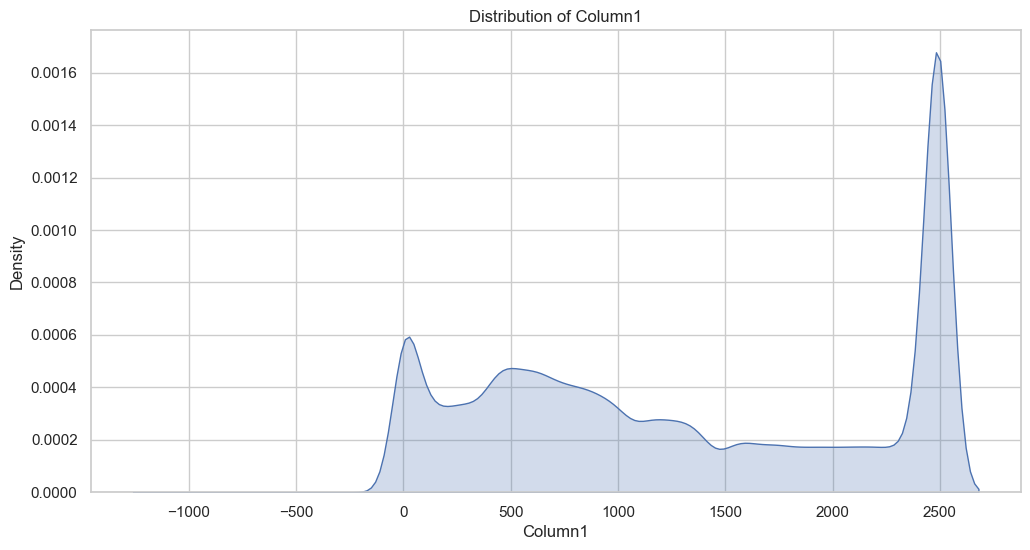

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


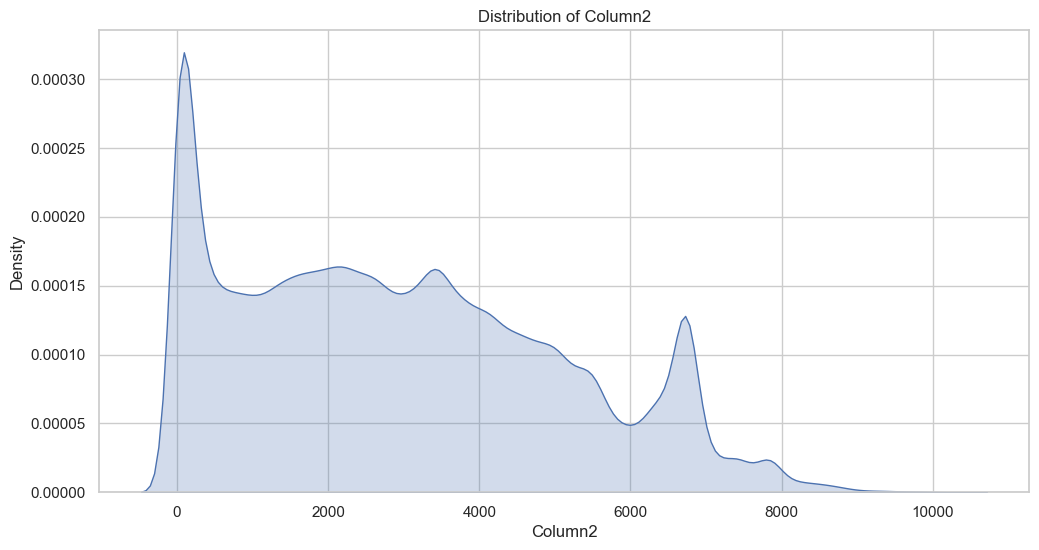

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


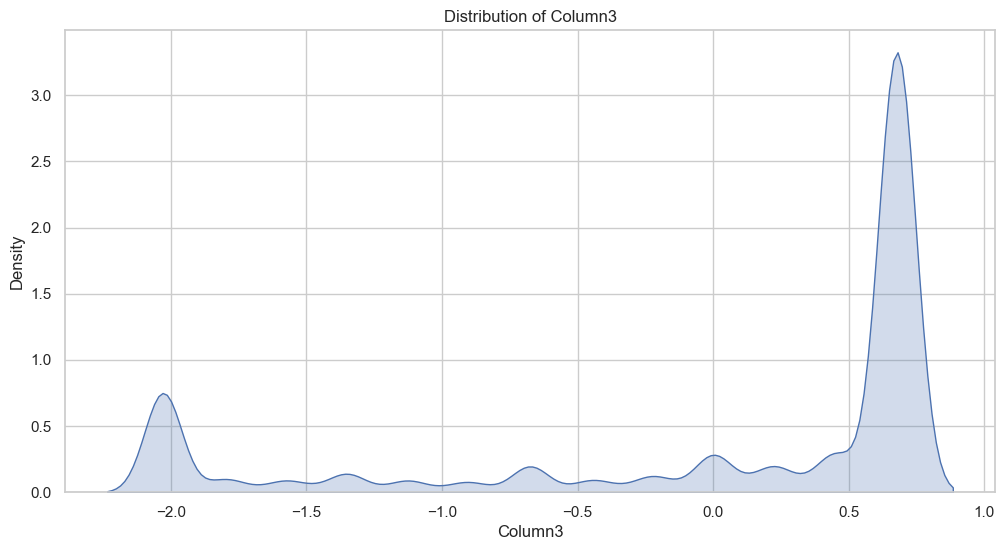

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


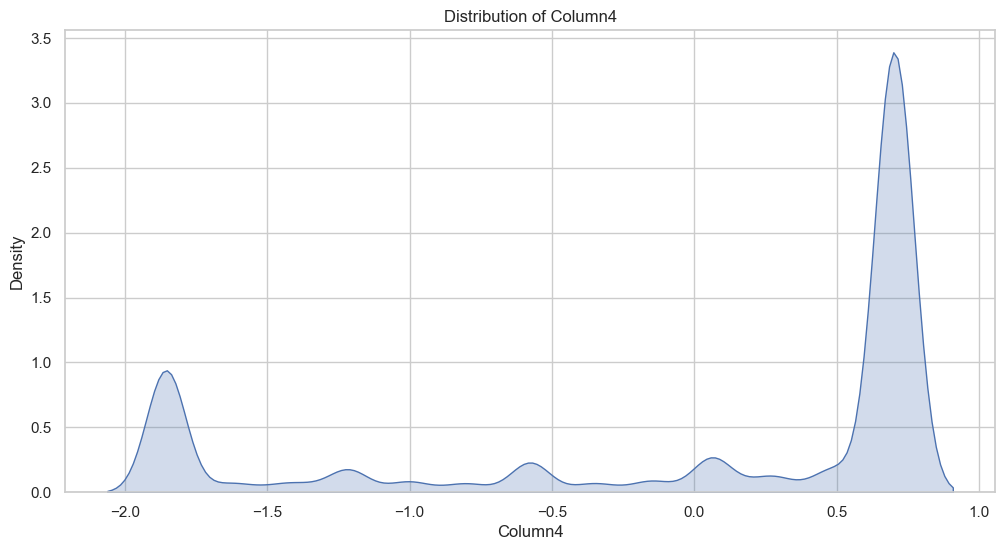

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


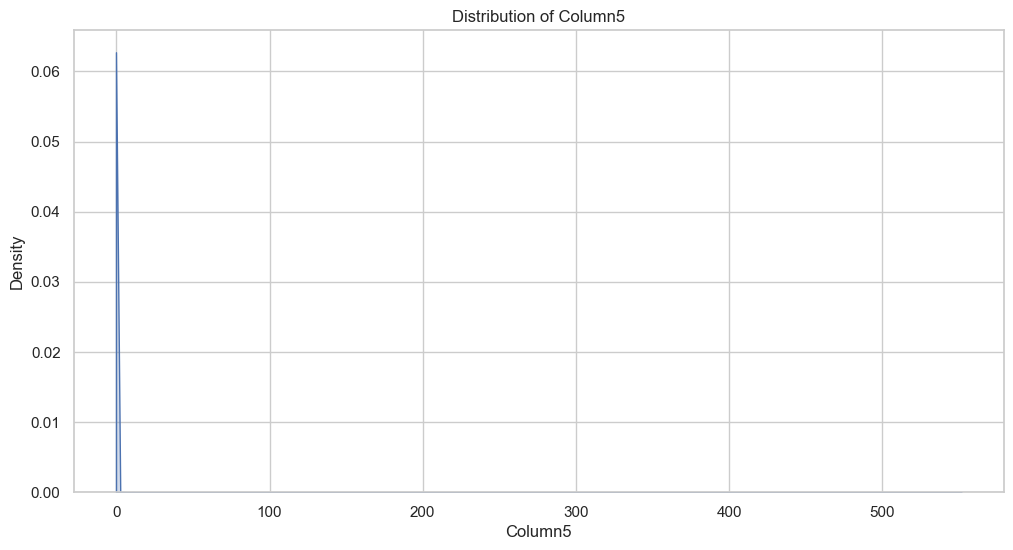

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


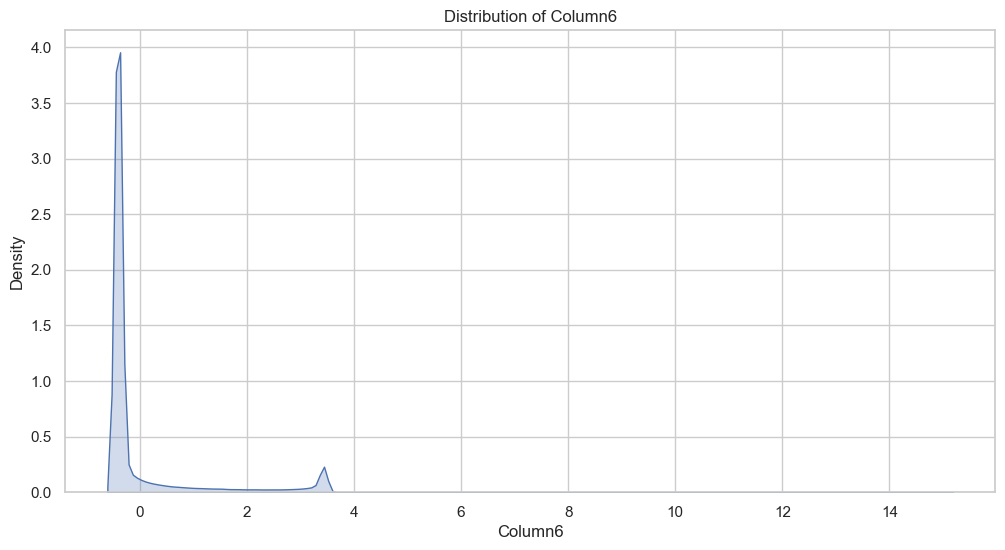

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


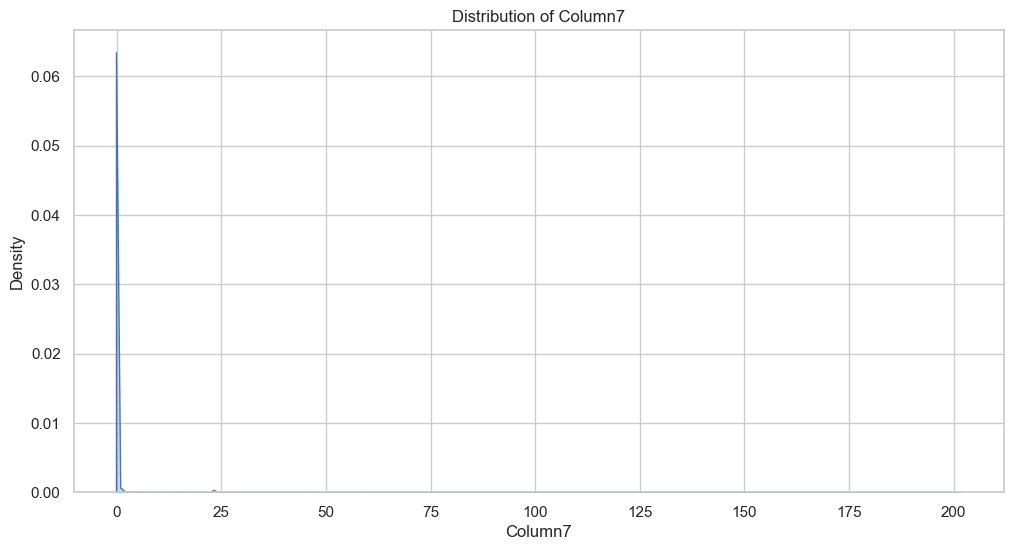

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


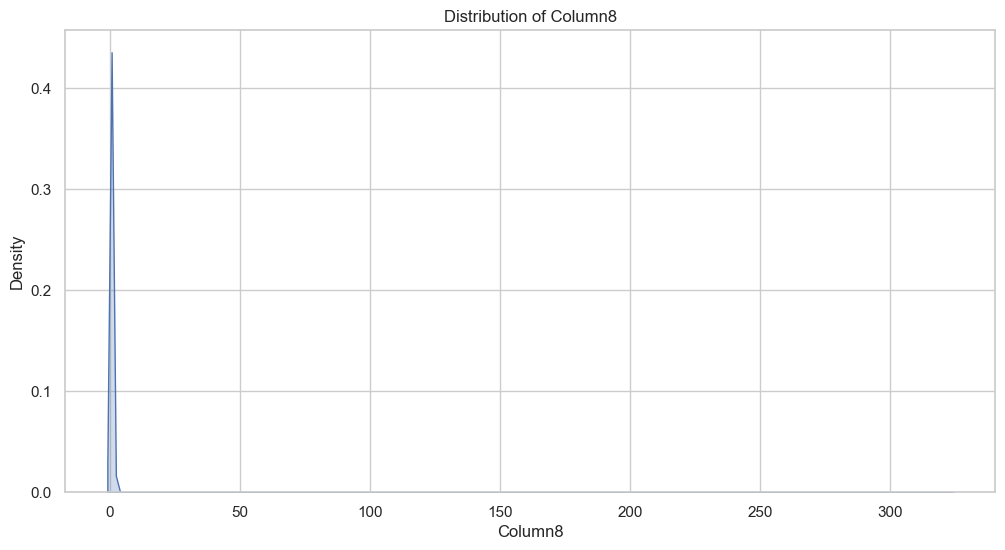

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


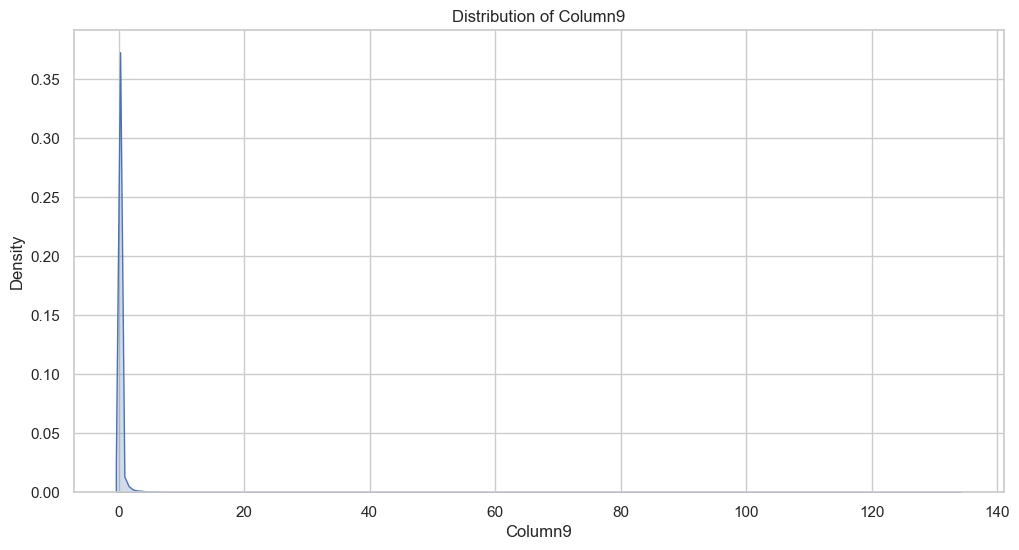

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


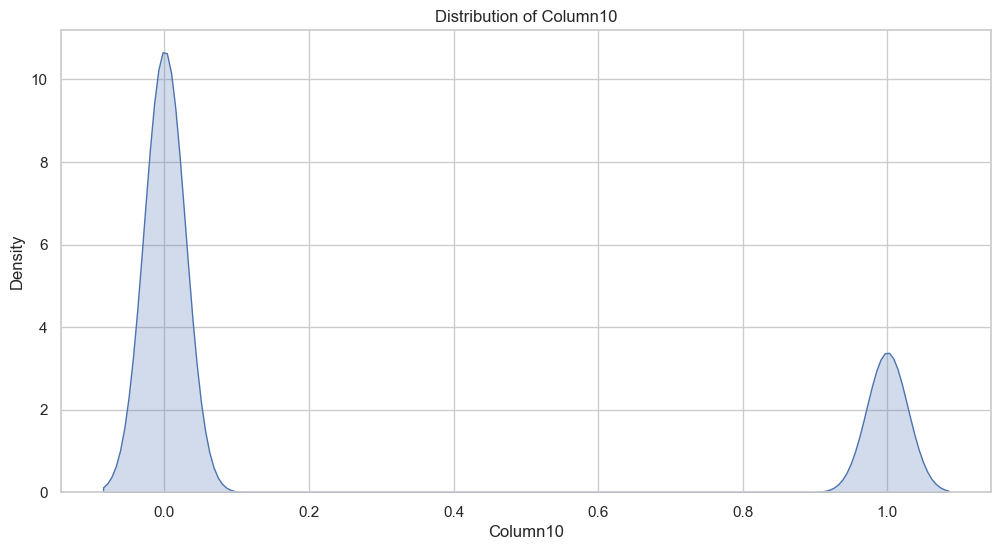

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


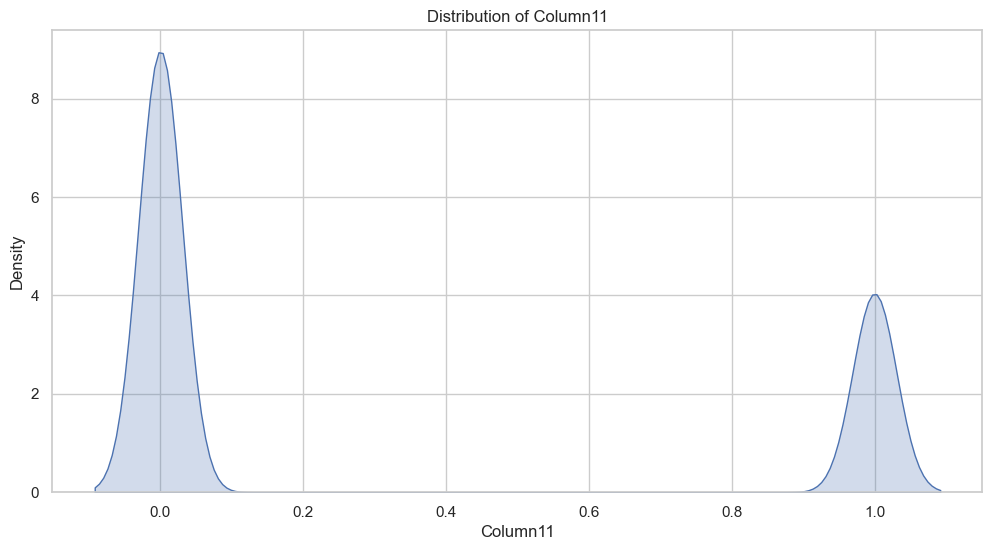

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


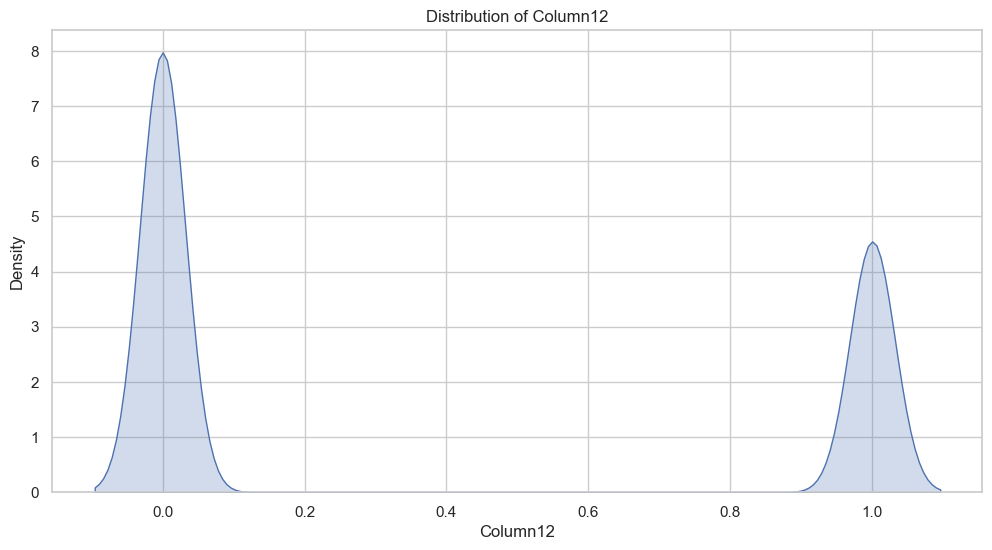

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


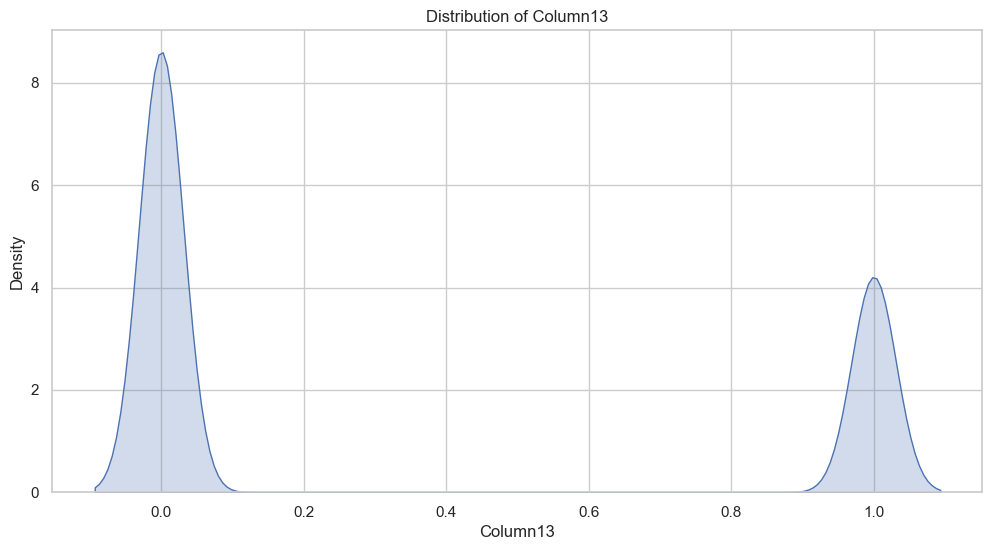

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


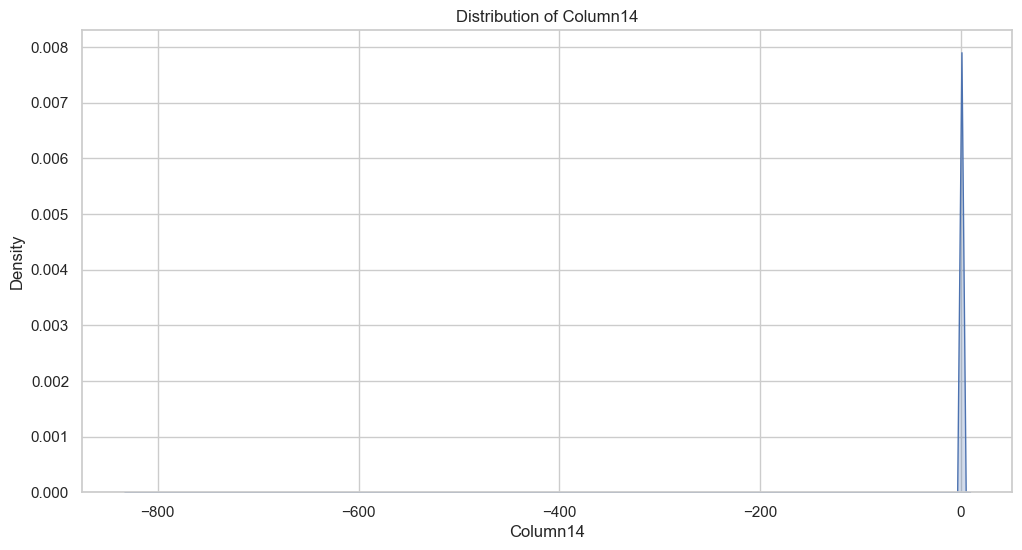

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


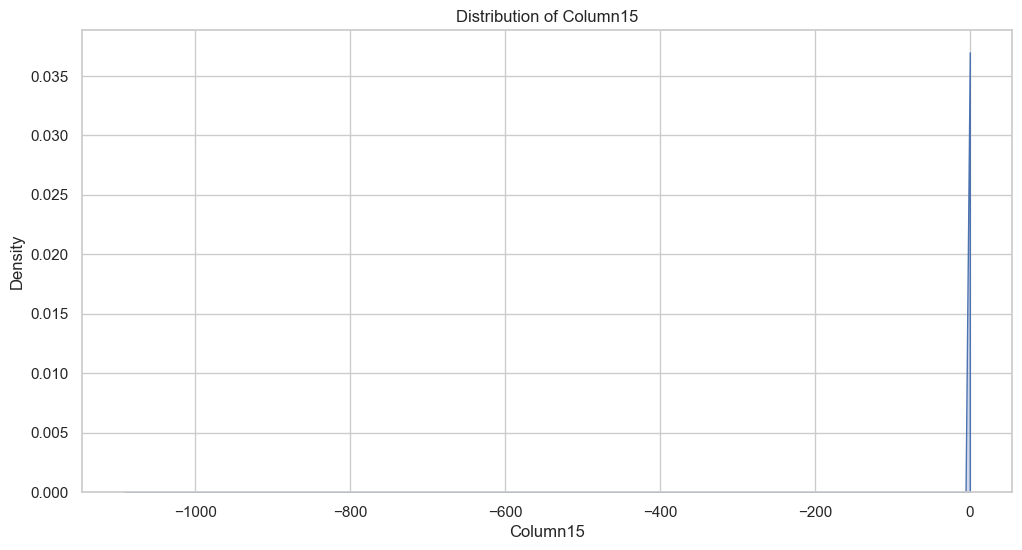

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


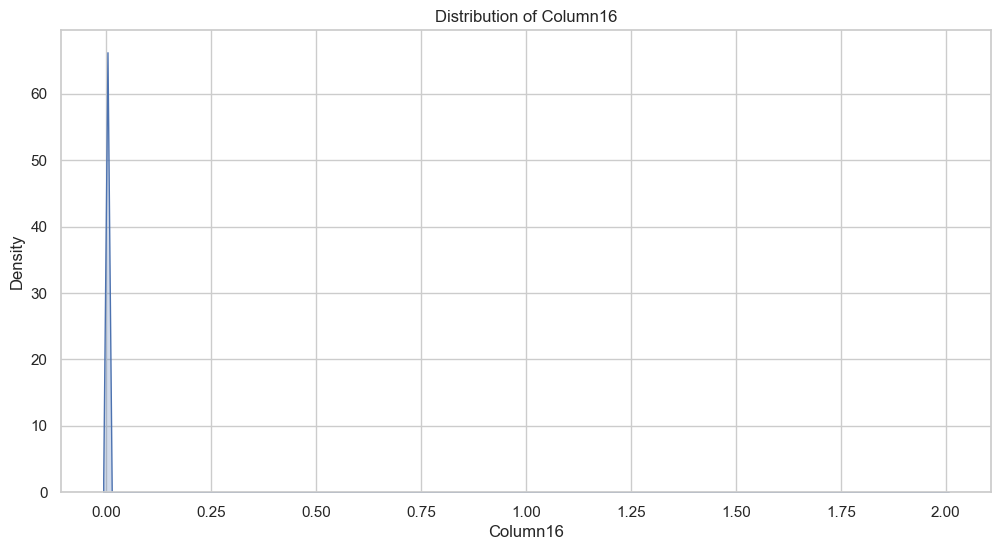

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


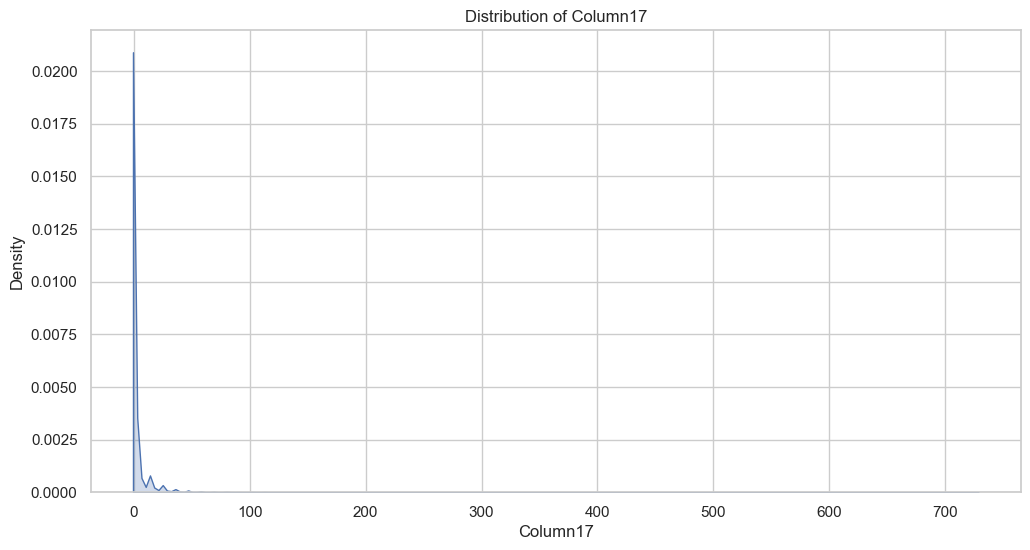

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


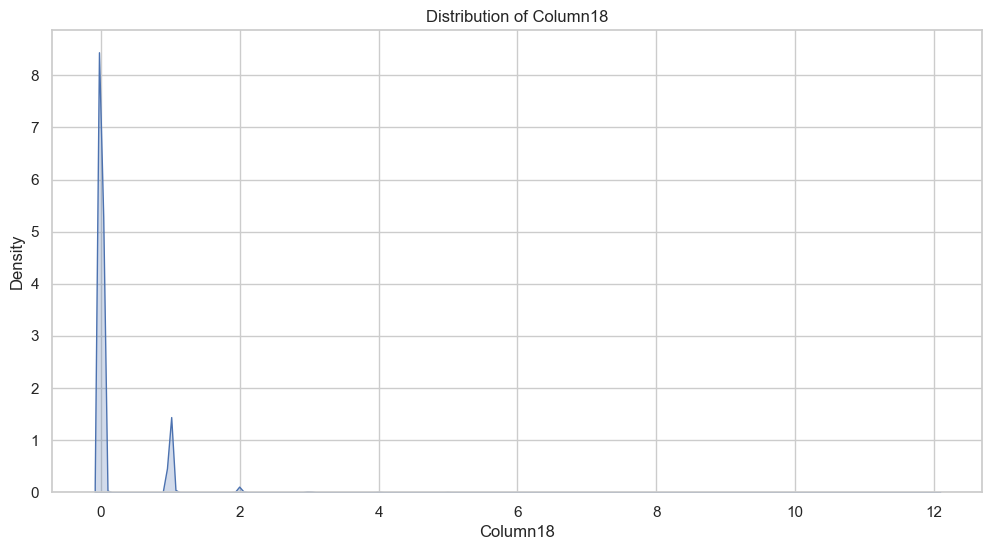

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


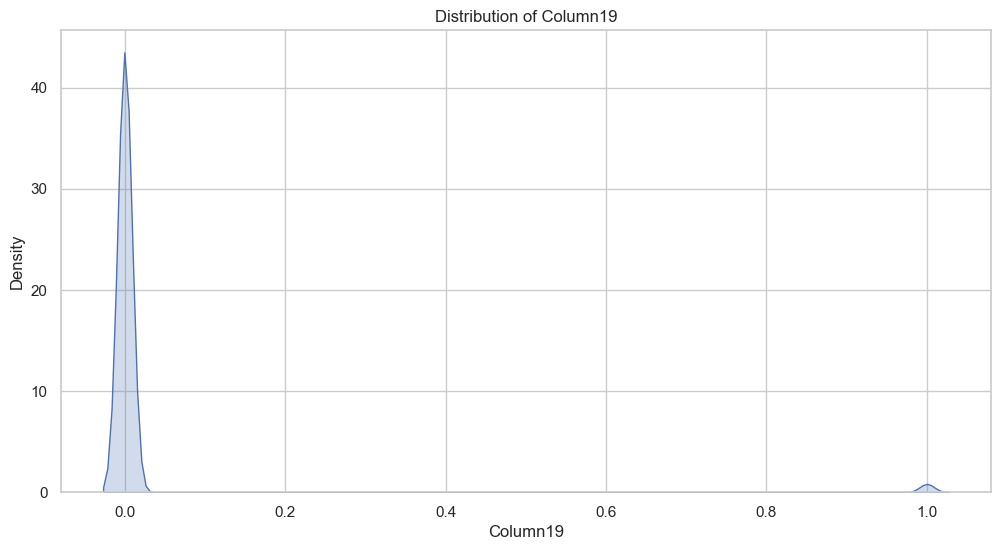

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


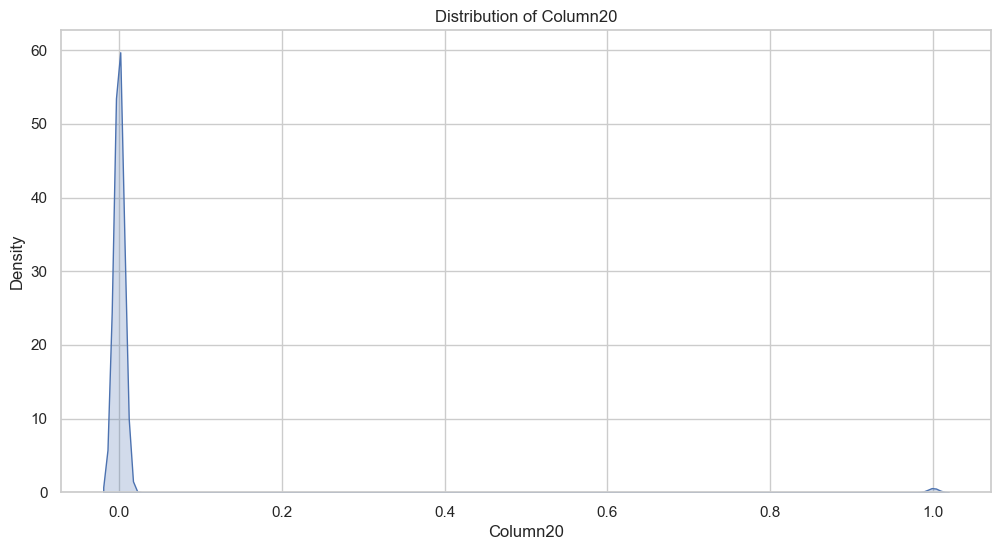

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


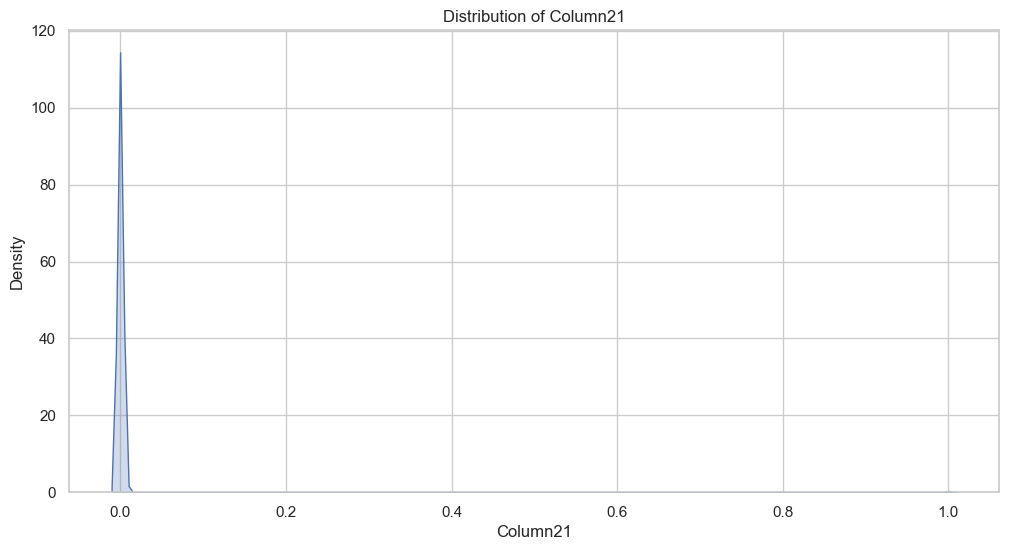

C:\Users\MUTHU SELVI\AppData\Local\Temp\ipykernel_13164\868740837.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train[column], shade=True)


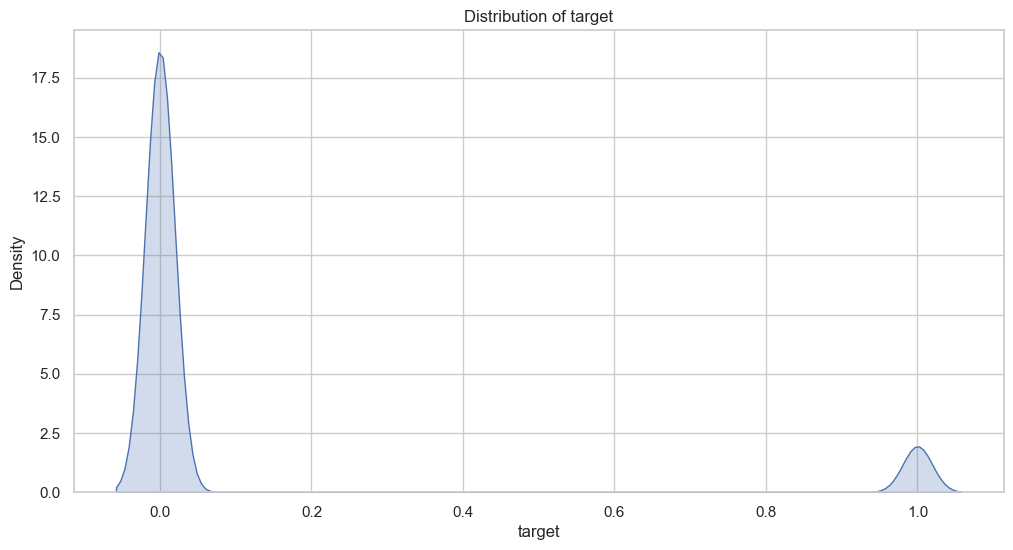

In [24]:
# Distribution of numerical features using KDE plots
for column in X_train.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.kdeplot(X_train[column], shade=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [26]:
# Count plots for categorical features
categorical_columns = X_train.select_dtypes(include='object').columns
for column in categorical_columns:
    plt.figure()
    sns.countplot(y=X_train[column])
    plt.title(f"Count Plot of {column}")
    plt.show()

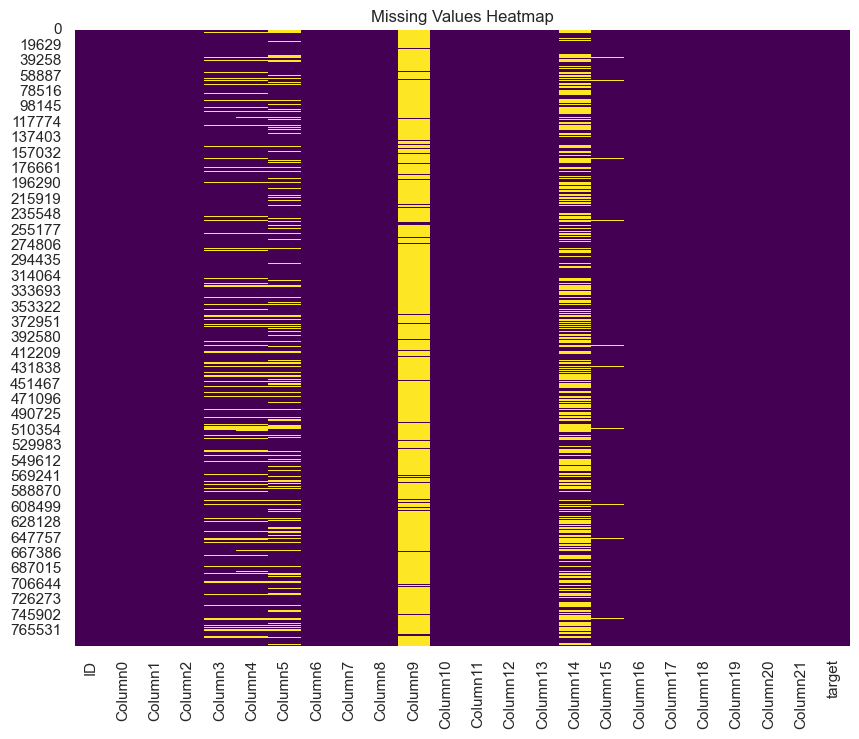

In [27]:
# Heatmap for missing values
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [29]:
# Correlation with the target variable (if it's numeric)
if pd.api.types.is_numeric_dtype(Y_train['target']):
    correlations_with_target = X_train.corrwith(Y_train['target'])
    print("\nCorrelation with Target Variable:")
    print(correlations_with_target)



Correlation with Target Variable:
ID         -0.000410
Column0    -0.064456
Column1    -0.374542
Column2    -0.114910
Column3    -0.098067
Column4    -0.121181
Column5     0.001221
Column6    -0.102652
Column7    -0.004858
Column8    -0.129717
Column9    -0.000796
Column10   -0.097229
Column11   -0.086418
Column12   -0.128421
Column13   -0.094361
Column14    0.000305
Column15   -0.006846
Column16    0.087492
Column17    0.248896
Column18    0.727999
Column19    0.258609
Column20    0.135516
Column21    0.119171
target      1.000000
dtype: float64


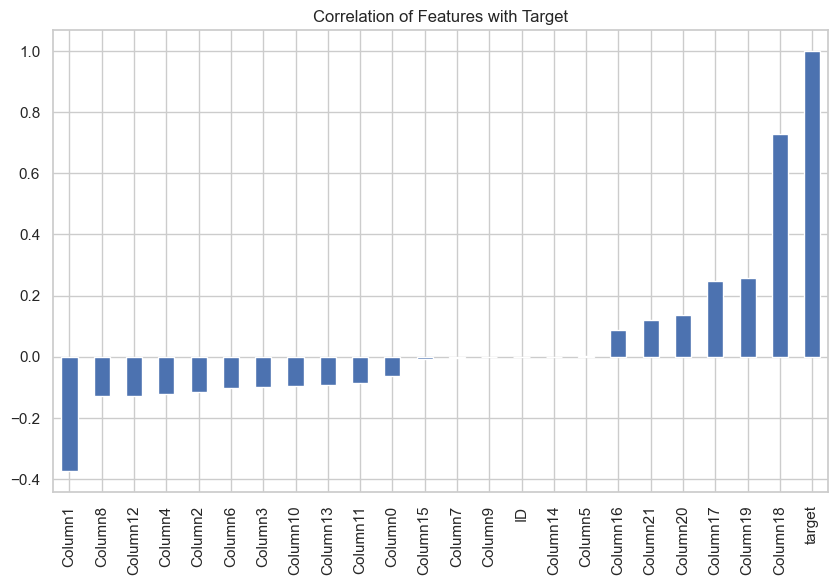

In [30]:

# Visualizing the correlation with target
correlations_with_target.sort_values().plot(kind='bar', figsize=(10, 6))
plt.title("Correlation of Features with Target")
plt.show()